## Inicialização

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import math
import qiskit
from qiskit import qasm3
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_qsphere
from qiskit import transpile
from qiskit.visualization import plot_state_city, plot_histogram
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from pylatexenc import *

## Versão do Qiskit utilizada neste tutorial

In [2]:
qiskit.__version__

'1.2.4'

## Demo 1 - Um QUBIT é o equivalente de um BIT na computação clássica, mas ao contrário de um BIT, que só pode assumir dois estados, o computador quantico permite multiplos estados. Quando lido, o QUBIT assume um dos estados estáveis, definidos como 0 ou 1. Ou seja, ler o QUBIT "altera" seu valor

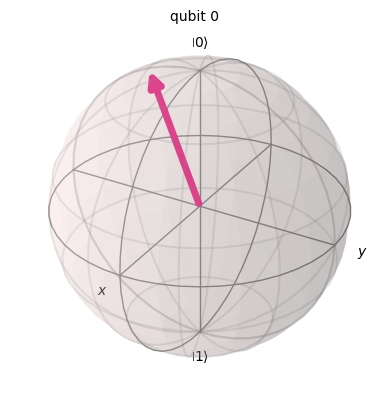

In [3]:
qc = QuantumCircuit(1,1)
#qc.h(0)
qc.rx(math.pi / 8 , 0)
#qc.rz(math.pi /2, 0)
#qc.ry(math.pi / 2, 0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
plot_bloch_multivector(qc)

## Demo 1 - Cada uma das instruções permitem  rotações em torno dos eixos. Temos instruções para rotação nos eixos X, Y e Z

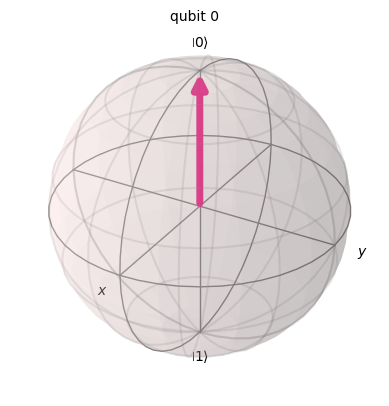

In [4]:
qc = QuantumCircuit(1,1)
qc.rz(math.pi / 4, 0)
plot_bloch_multivector(qc)

## Demo 1 - Em qualquer estado não estável, o QUBIT pode apontar para diferentes posições, e uma vez lido pode assumir diferentes estados

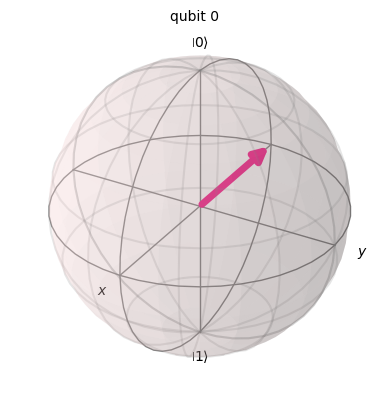

In [5]:
qc = QuantumCircuit(1,1) 
qc.rx(math.pi / 2, 0)
qc.rz(3 * math.pi/2, 0)
plot_bloch_multivector(qc)

## Demo 2 - Um circuito em hadamard (ou superposição) tem iguais probabilidades de gerar um resultado 0 ou resultado 1

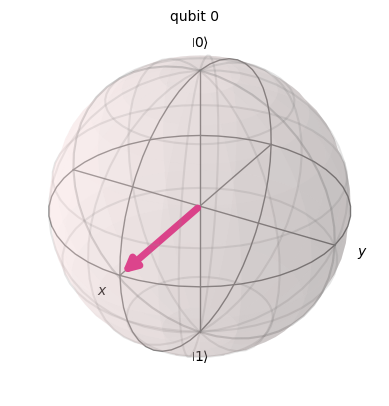

In [6]:
circ = QuantumCircuit(1)
circ.h(0)
# circ.measure_all()
# simulator = BasicSimulator()
# result = simulator.run(circ).result()
# counts = result.get_counts()
# print(counts)
plot_bloch_multivector(circ)

## Demo 2 - Podemos controlar a criação do Circuito quantico definindo quantos QUBITs desejamos e quantos ClassicalBits desejamos

In [7]:
from qiskit import *
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(0)
qc.measure_all()
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

{'0 0': 521, '1 0': 503}


### Demo 3 - O emaranhamento pode ser criado quando dois QUBITs assumem um estado de dependência entre eles. Quando um dos QUBITs se altera, o outro também se altera de forma complementar

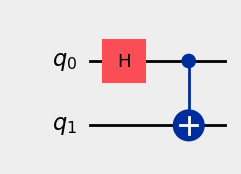

In [8]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
# circ.measure_all()
# simulator = BasicSimulator()
# result = simulator.run(circ).result()
# counts = result.get_counts()
# print(counts)

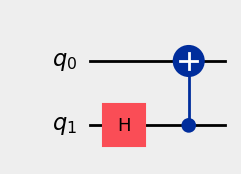

In [9]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(2)
circ.h(1)
circ.cx(1,0)
circ.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

# Demo 4 - Porta X - inversor

## Inicialmente o estado de um QUBIT é Zero, e temos instruções para invertê-lo e torná-lo UM e vice versa.

In [10]:
qc = QuantumCircuit(1)   
qc.x(0)
qc.measure_all()
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'1': 1024}


## Demo 4 - O Computador quantico trabalha em cooperação com um computador tradicional. Podemos transformar um QUBIT para CBIT (Classical BIT) para fazer algum processamento adicional no computador clássico

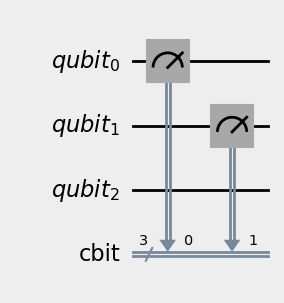

In [11]:
q = QuantumRegister(3, name="qubit")
c = ClassicalRegister(3, name="cbit")
qc = QuantumCircuit(q, c)
qc.measure([0,1], [0,1])
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## Demo 5 - Como o CBIT só pode ter os valores zero e um, quando convertidos a partir de um QUBIT assumem uma probabilidade de serem ZERO ou UM.

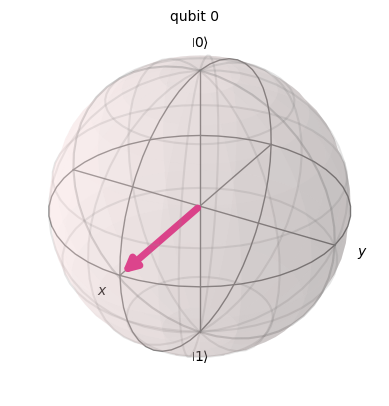

In [12]:
qc = QuantumCircuit(1)   
qc.h(0)                        
# qc.measure_all()
# simulator = AerSimulator()
# result = simulator.run(qc).result()
# counts = result.get_counts()
# print(counts)
plot_bloch_multivector(qc)

## Demo 6 - As portas X,Y e Z permitem rotacionar em torno dos eixos

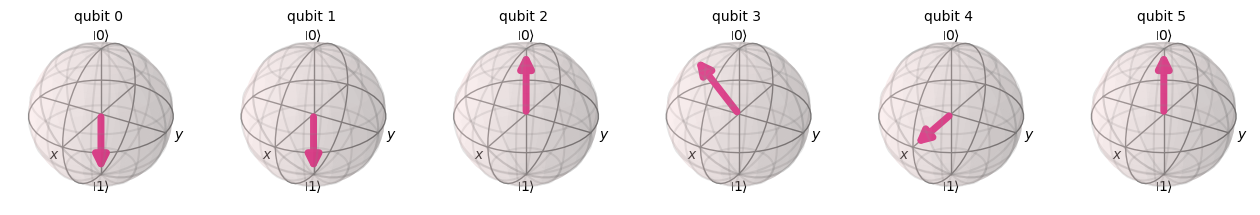

In [13]:
qc = QuantumCircuit(6)   
qc.x(0) 
qc.y(1)
qc.z(2)
qc.rx(math.pi /4, 3) 
qc.ry(math.pi /2, 4)
qc.rz(math.pi * 2, 5)
# qc.measure_all()
# simulator = BasicSimulator()
# result = simulator.run(qc).result()
# counts = result.get_counts()
# print(counts)
plot_bloch_multivector(qc)

## Demo 6 - As portas de multiplos QUBITs permitem construir circuitos onde um QUBIT interfere em outros, proporcionando circuitos mais complexos

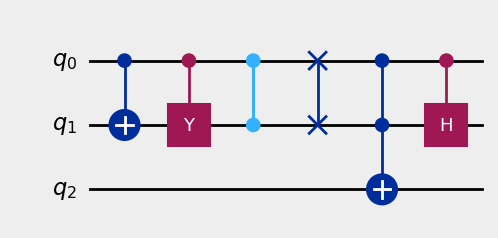

In [14]:
qc = QuantumCircuit(3)  
qc.cx(0, 1)
qc.cy(0,1)
qc.cz(0,1)
qc.swap(0,1)
qc.ccx(0,1,2)
qc.ch(0,1)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

## Demo 7 - Simulação das portas lógicas tradicionais com QUBITS

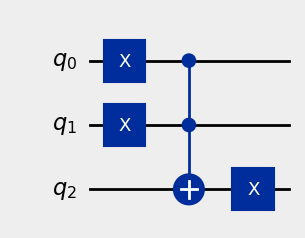

In [15]:
qc = QuantumCircuit(3)  
# qc.ccx(0, 1, 2)
# qc.x(2)
#qc.cx(0,1)
#qc.x(0)
qc.x([0,1])
qc.ccx(0,1,2)
qc.x(2)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

## Demo 8 - Operações aritméticas - Incremento e decremento

In [16]:
# incremento
a = QuantumRegister(1, "A")
b = QuantumRegister(1, "B")
c = QuantumRegister(1, "C")
qc = QuantumCircuit(a,b,c)  
qc.x(0)
qc.ccx(a,b,c)
qc.cx(a,b)
qc.x(a)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
qc.measure_all()
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

#decremento
# qc = QuantumCircuit(a,b,c) 
# qc.x(a)
# qc.cx(a,b)
# qc.ccx(a,b,c)
# qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})


{'010': 1024}


## Demo 8 - Transformando um número em negativo

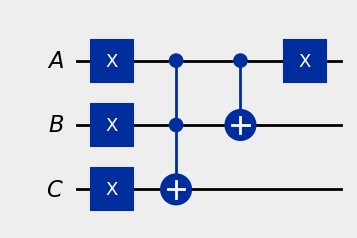

In [17]:
# negativo
a = QuantumRegister(1, "A")
b = QuantumRegister(1, "B")
c = QuantumRegister(1, "C")
qc = QuantumCircuit(a,b,c)  
qc.x(a)
qc.x(b)
qc.x(c)
qc.ccx(a,b,c)
qc.cx(a,b)
qc.x(a)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
# qc.measure_all()
# simulator = AerSimulator()
# result = simulator.run(qc).result()
# counts = result.get_counts()
# print(counts)

## Demo 8 - Operações ariitméticas com QUBITS - soma A e B

In [18]:
# soma A = A + B
a1 = QuantumRegister(1, "A1")
a2 = QuantumRegister(1, "A2")
b1 = QuantumRegister(1, "B1")
b2 = QuantumRegister(1, "B2")
qc = QuantumCircuit(a1,a2,b1,b2)  

qc.x(a1)
# qc.x(a2)
qc.x(b1)
# qc.x(b1)
# qc.x(b1)

qc.ccx(a1,b1,a2)
qc.cx(b1,a1)
qc.cx(b2,a2)

qc.measure_all()
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

# qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'0110': 1024}


## Demo 8 - Subtrae dois conjuntos de QUBITs

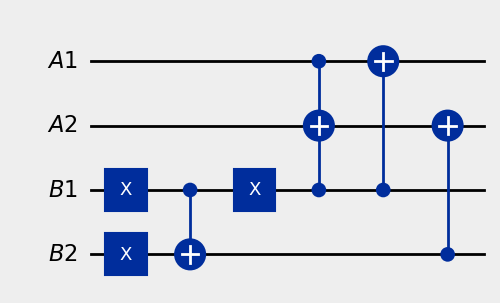

In [19]:
# soma A = A + B
a1 = QuantumRegister(1, "A1")
a2 = QuantumRegister(1, "A2")
b1 = QuantumRegister(1, "B1")
b2 = QuantumRegister(1, "B2")
qc = QuantumCircuit(a1,a2,b1,b2)  

# qc.x(a1)
# qc.x(a2)
# qc.x(b1)
# qc.x(b2)
# qc.x(b1)

qc.x(b1)
qc.x(b2)
qc.cx(b1,b2)
qc.x(b1)
qc.ccx(a1,b1,a2)
qc.cx(b1,a1)
qc.cx(b2,a2)

# qc.measure_all()
# simulator = AerSimulator()
# result = simulator.run(qc).result()
# counts = result.get_counts()
# print(counts)

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

## Demo 9 - Gerador de números randômicos

In [20]:
qc = QuantumCircuit(4)  
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.measure_all()
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'1110': 59, '0111': 49, '1000': 62, '0101': 61, '1001': 58, '0100': 64, '1100': 59, '1011': 73, '1010': 65, '0000': 73, '0010': 59, '0110': 67, '0001': 72, '0011': 72, '1101': 67, '1111': 64}


## Demo 10 - QFT - Quantum Fourier Transform

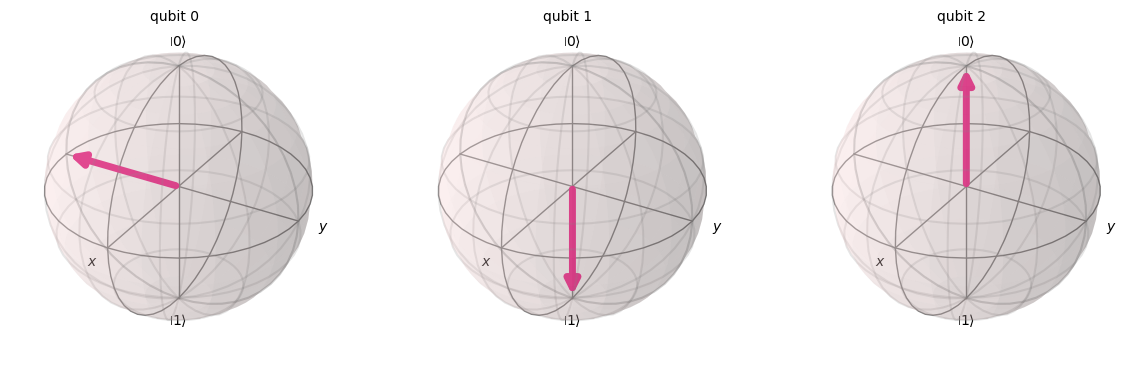

In [21]:
qc = QuantumCircuit(3) 
qc.h(0)
qc.h(1)
qc.h(2)

qc.rz(math.pi /2, 0)
qc.rz(math.pi ,    1)
qc.rz(math.pi * 2, 2)


qc.h(2)
qc.crz(math.pi/2, 2, 1)
qc.crz(math.pi/4, 2, 0)
qc.h(1)
qc.crz(math.pi * 2, 1, 0)
qc.h(0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
plot_bloch_multivector(qc)

## Demo 11 - A topologia dos computadores pode variar, e a tecnologia do QISKIT permite que diversas topologias de construção de computadores quanticos sejam criados. Isto torna o software adequado para as gerações atuais e futuras de computadores quanticos

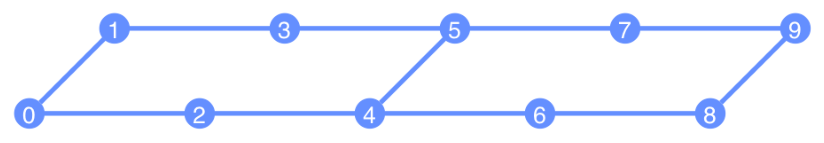

In [22]:
from qiskit.visualization import plot_coupling_map
num_qubits = 10

coupling_map = [[0,1],[1,3],[0,2],[2,4],[4,6], [6,8], [3,5], [5,7],[7,9], [4,5], [8,9]]  
# conexões entre os QUBITS
qubit_coordinates = [[0,1], [1, 2], [0, 3], [1, 4], [0,5], [1,6], [0,7], [1,8], [0,9], [1,10]]   
# camadas
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

## Demo 11 - Nem todas as instruções podem ser executadas por todos os computadores. Algumas vezes precisamos "decompor" instruções mais complexas em instruções mais simples, tornando a execução mais simples em um computador quantico.

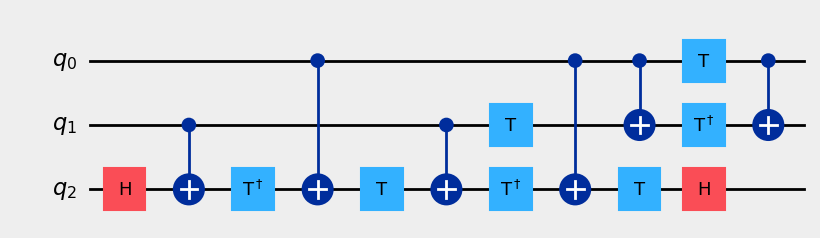

In [23]:
qc = QuantumCircuit (3)
qc.ccx (0,1,2)
qc.decompose().draw (output='mpl', style={'backgroundcolor': '#EEEEEE'}) #D - OK, BUT DECOMPOSE

## Demo 11 - Podemos agrupar elementos em um circuito, de forma 

2


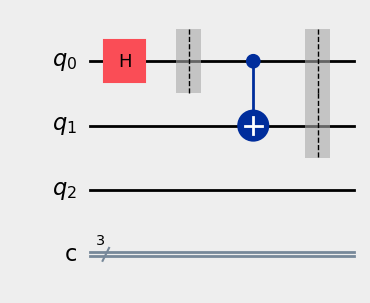

In [24]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])
depth = qc.depth()
print(depth)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## Demo 11 - Os códigos em QISKIT são convertidos no ASSEMBLER verdadeiro do computador quantico, que é a linguagem QASM. 

In [25]:
from qiskit.qasm3 import *
from qiskit.qasm3 import dumps
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.x(0)

print(dumps(qc))

OPENQASM 3.0;
include "stdgates.inc";
bit[1] c;
qubit[1] q;
h q[0];
x q[0];



## Demo 11 - Também podemos criar circuitos a partir de um código em QASM

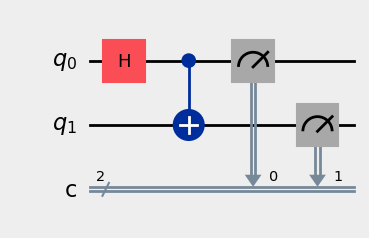

In [26]:
qasm_str = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q -> c;
"""
# program = """
#     OPENQASM 3.0;
#     include "stdgates.inc";
 
#     input float[64] a;
#     qubit[3] q;
#     bit[2] mid;
#     bit[3] out;
 
#     let aliased = q[0:1];
 
#     gate my_gate(a) c, t {
#       gphase(a / 2);
#       ry(a) c;
#       cx c, t;
#     }
#     gate my_phase(a) c {
#       ctrl @ inv @ gphase(a) c;
#     }
 
#     my_gate(a * 2) aliased[0], q[{1, 2}][0];
#     measure q[0] -> mid[0];
#     measure q[1] -> mid[1];
 
#     while (mid == "00") {
#       reset q[0];
#       reset q[1];
#       my_gate(a) q[0], q[1];
#       my_phase(a - pi/2) q[1];
#       mid[0] = measure q[0];
#       mid[1] = measure q[1];
#     }
 
#     if (mid[0]) {
#       let inner_alias = q[{0, 1}];
#       reset inner_alias;
#     }
 
#     out = measure q;
# """

qc = QuantumCircuit.from_qasm_str(qasm_str)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

## Demo 11 -  Podemos programar dinamicamente algorítmos, criando circuitos de acordo com alguma logica, tornando os códigos em QISKIT mais ricos

In [27]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)
with qc.switch(creg) as case:
    with case(0):
        qc.x(0)
    with case(1):
        qc.x(1)

qasm_string = qasm3.dumps(qc, experimental=qasm3.ExperimentalFeatures.SWITCH_CASE_V1)
print(qasm_string)

OPENQASM 3.0;
include "stdgates.inc";
bit[2] c1;
int switch_dummy;
qubit[2] q2;
switch_dummy = c1;
switch (switch_dummy) {
  case 0: {
    x q2[0];
  }
  break;
  case 1: {
    x q2[1];
  }
  break;
}



## Demo 12 - Para que possamos fazer experiências com os QUBITs, temos que ser capazes de fazer medidas e retirar métricas. Para isto, diversos tipos de gráficos estão disponíveis. Temos gráficos visuais que representam os QUBITs em esferas, cada um em seu gráfico separado, ou podemos representar um mapa de estados com todos os QUBITS em um gráfico apenas 

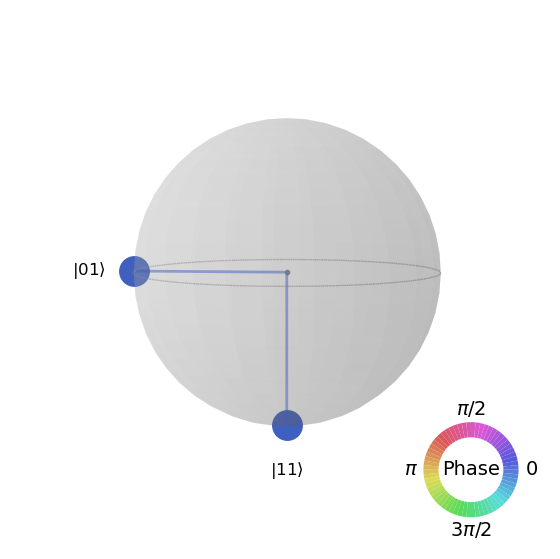

In [28]:
qc = QuantumCircuit(2)   
qc.ry(math.pi, 0)
qc.h(1)

matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)

## Demo 12 - Também podemos gerar gráficos de histograma, que nos mostra a distribuição dos QUBITS para uma dada execução

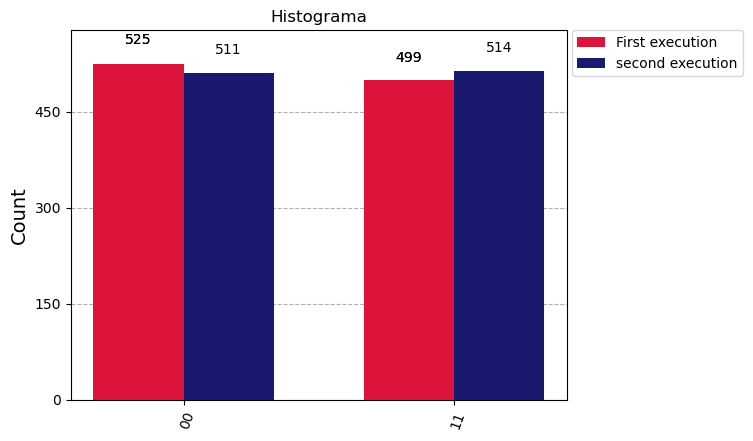

In [29]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.cx(0,1)

circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()

counts1 = {'00': 525, '11': 499}
counts2 = {'00': 511, '11': 514}
 
legend = ['First execution', 'second execution']
 
#plot_histogram([counts], legend=legend, color=['crimson'],  title="Histograma")
plot_histogram([counts1, counts2], legend=legend, color=['crimson', 'midnightblue'], title="Histograma")

## Demo 12 - Gráficos do tipo state city 

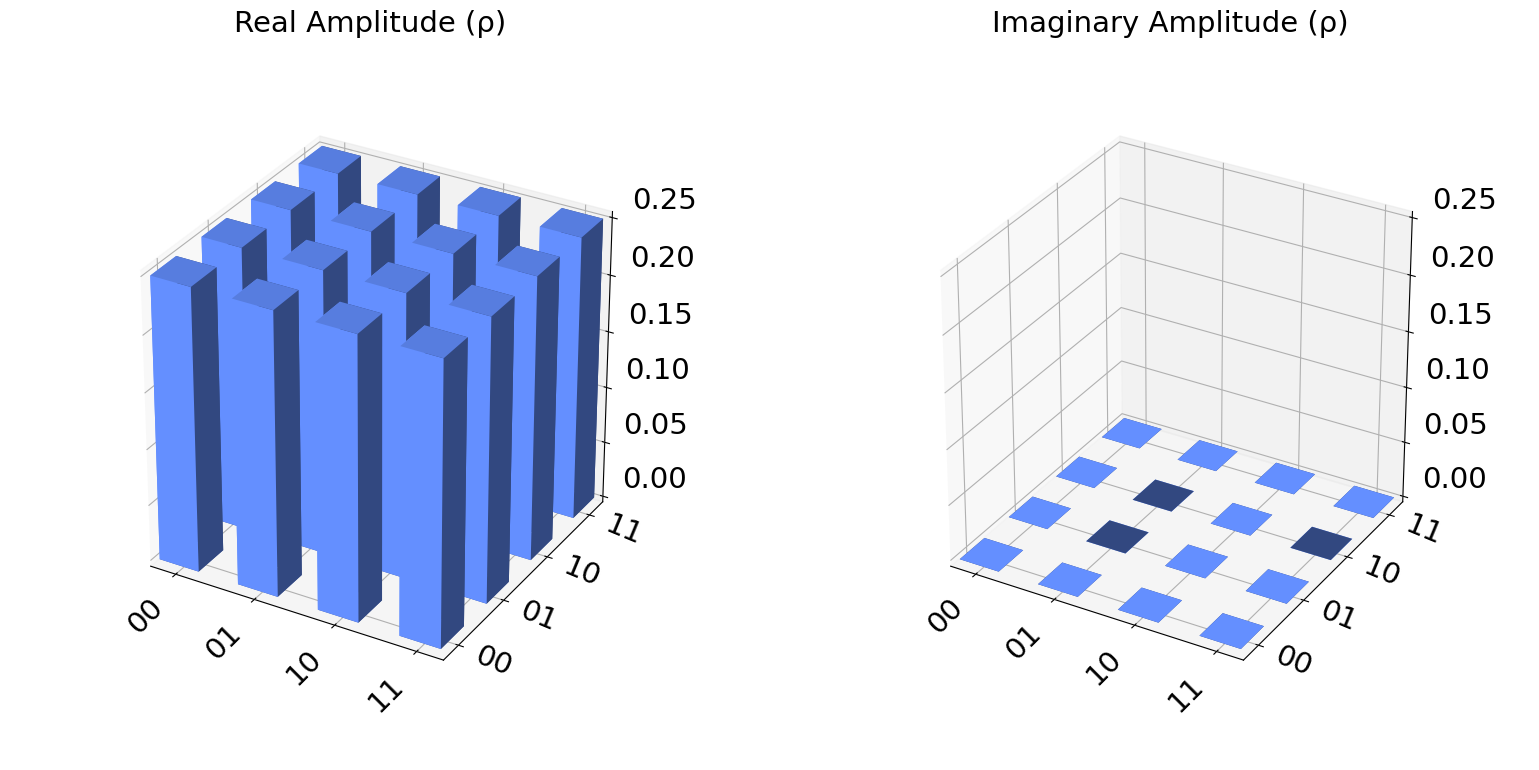

In [30]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.measure_all() 
 
# Current
qc.remove_final_measurements()  # no measurements allowed
statevector = Statevector(qc)
plot_state_city(statevector)

## Demo 12 - Estados também podem ser impressos e analisados

In [31]:
from qiskit import QuantumCircuit
from math import sqrt
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)
qc.h(0)
# qc.h(1)
# qc.cx(1, 2)
qc.measure_all()  

qc.remove_final_measurements()  
statevector = Statevector(qc)
print(statevector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


##### Common Gates
GATE | rotation | name |
--- | --- | ---- |
qc.h | X+Z (pi) | hadamard (no angle) |
qc.i,qc.id | 0 | identity (no effect) |
qc.p | Z (∅) | Phase (change Phase - rotate Z Axis) |
qc.rx | X (∅) | RX  (need angle) | 
qc.ry | Y (∅) | RY  (need angle) | 
qc.rz | Z (∅) | RZ  (need angle) | 
qc.s | Z (PI/2) | same as p(PI/2, gate) | 
qc.sdg | Z (3PI/2) | same as p(3PI/2, gate) | 
qc.sx | X (PI/2) | same as rx(PI/2, gate) | 
qc.t | Z (PI/4) | same as p(PI/4, gate) | 
qc.tdg | Z (7PI/4) | same as p(7PI/4, gate) | 
qc.u | Y,Z,Z | Apply 3 angles to QUBIT (Y,Z,Z) this order  | 
qc.x | X | same as rx(PI, gate) | 
qc.y | Y | same as ry(PI, gate) | 
qc.z | z | same as rz(PI, gate) | 
###### MultiGates
GATE | rotation | name | 
--- | --- | ---- |
qc.ccx | X | X rotate controled by 2 QUBITs (no angle) - AKA TOFFOLI | 
qc.c3sx | sx | X rotate controled by 3 QUBITs (angle) | 
qc.c4sx | x | X rotate controled by 4 QUBITs (no angle) | 
qc.ch | H | Aply hadamard accoring control gate (no angle) | 
qc.cp | Y | Apply phase (Z) with angle controlled | 
qc.crx | X | rotate X with provided angle controled | 
qc.cry | Y | rotate Y with provided angle (same as TOFFOLI) | 
qc.crzb | Z | rotate Z with provided angle | 
qc.cswap | swap | swap two controled qubits | 
qc.csx | sx | pi/2 (square root) controled | 
qc.cu  | Y,Z,Z  | U controled | 
qc.cx,qc.cnot | X | Apply x controled (inversor) | 
qc.cy | Y | Apply y controled | 
qc.cz | Z | Apply z controled | 
qc.dcx | cx | Double cnot on two qubits (q1 cntrl q2 and q2 cntrl q1) | 
qc.iswap | swap | swap two qubits change phase | 
qc.mcp | P | apply phase 3 control | 
qc.mcx | X | apply X 3 control | 
qc.swap | swap | swap two qubits | 

## Demo 12 - A distribuição de probabilidades também

In [32]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(1)
circ.h(0)
circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)

{'0': 504, '1': 520}
